In [16]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [17]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
from lightgbm import LGBMClassifier

In [19]:
url = url = 'https://raw.githubusercontent.com/Spakicey/2022-Formula1-Analysis/jdb-branch/master_1.csv'
df1 = pd.read_csv(url)
df1

,Final Race Position,Driver Name,Car,Race Laps,Race Time,Race Points,Fastest Lap No,Time of day,Fastest Lap Time,Avg Speed,...,P1 Gap,P1 Laps,Race,Final Sprint Postition,Sprint Laps,Sprint Time/Retired,Sprint PTS,Starting Sprint Postition,Sprint Grid Time,Quaifying Postition
0,1,Charles Leclerc LEC,Ferrari,57,97.000,26,51.0,70295.0,94.570,206.018,...,0.087,20.0,Bahrain,0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,Carlos Sainz SAI,Ferrari,57,102.598,18,52.0,70393.0,95.740,203.501,...,0.584,22.0,Bahrain,0,0.0,0.0,0.0,0.0,0.0,3.0
2,3,Lewis Hamilton HAM,Mercedes,57,106.675,15,53.0,70491.0,96.228,202.469,...,1.208,23.0,Bahrain,0,0.0,0.0,0.0,0.0,0.0,5.0
3,4,George Russell RUS,Mercedes,57,108.211,12,56.0,70782.0,96.302,202.313,...,0.593,25.0,Bahrain,0,0.0,0.0,0.0,0.0,0.0,9.0
4,5,Kevin Magnussen MAG,Haas Ferrari,57,111.754,10,53.0,70494.0,96.623,201.641,...,1.247,23.0,Bahrain,0,0.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,16,Kevin Magnussen MAG,Haas Ferrari,69,194.000,0,37.0,57464.0,83.511,188.856,...,1.373,29.0,Hungary,0,0.0,0.0,0.0,0.0,0.0,13.0
256,17,Alexander Albon ALB,Williams Mercedes,69,194.000,0,43.0,57982.0,83.047,189.911,...,2.170,20.0,Hungary,0,0.0,0.0,0.0,0.0,0.0,17.0
257,18,Nicholas Latifi LAT,Williams Mercedes,69,194.000,0,60.0,59447.0,82.478,191.221,...,2.043,30.0,Hungary,0,0.0,0.0,0.0,0.0,0.0,20.0
258,19,Yuki Tsunoda TSU,AlphaTauri RBPT,68,291.000,0,58.0,59297.0,83.538,188.795,...,2.076,31.0,Hungary,0,0.0,0.0,0.0,0.0,0.0,16.0


In [97]:
# Create our features
X = df1.copy()
X = X.drop(["Race Points","Final Race Position","Race Time","Driver Name","Sprint Time/Retired","Car","Race"], axis=1)


# Create our target
y = df1['Race Points']

In [98]:
# COnvert all object types to category types

for c in X.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[c] = X[c].astype('category')

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Race Laps                  260 non-null    int64  
 1   Fastest Lap No             260 non-null    float64
 2   Time of day                260 non-null    float64
 3   Fastest Lap Time           260 non-null    float64
 4   Avg Speed                  260 non-null    float64
 5   Stops                      260 non-null    float64
 6   Total Pit Time             260 non-null    float64
 7   Starting Grid Pos          260 non-null    float64
 8   Starting Grid Quali Time   260 non-null    float64
 9   Qualifying Postition       259 non-null    float64
 10  Q1                         260 non-null    float64
 11  Q2                         260 non-null    float64
 12  Q3                         260 non-null    float64
 13  Qualifying Laps            259 non-null    float64

In [100]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [105]:
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test, y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }


clf = lgb.LGBMClassifier(num_leaves= 15, max_depth=10, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=10,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1)

In [106]:
clf.fit(X_train, y_train)

C:\Users\Andrzej\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(colsample_bytree=0.9, max_depth=10, metric='None',
               n_estimators=10, n_jobs=4, num_leaves=15, random_state=314,
               silent=True, subsample=0.9)

<AxesSubplot:>

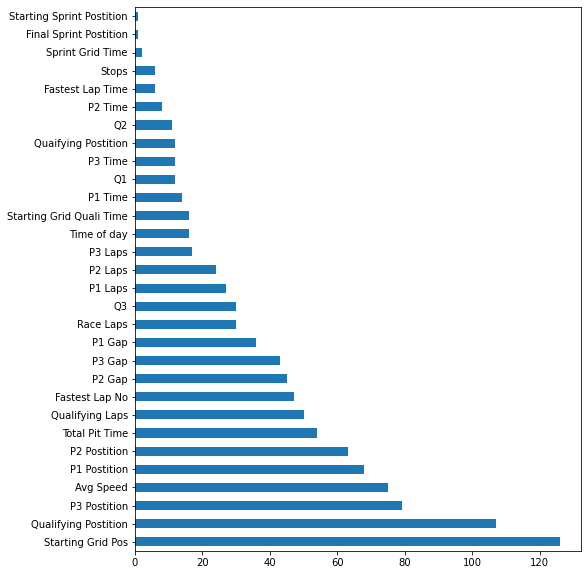

In [107]:
# Plot feature importance
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [108]:
print('Training accuracy {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(clf.score(X_test,y_test)))

Training accuracy 0.8205
Testing accuracy 0.5538


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

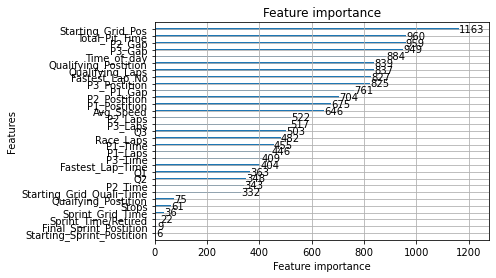

In [15]:
lgb.plot_importance(clf)